In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Student Performance 

In [2]:
table = pd.read_csv('../datasets/StudentsPerformance.csv')

In [3]:
table.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## A Study In Gender and race/ethnicity

Let's examine the effect gender and race/ethnicity have on the different scores. To do this we will use some pandas tricks using groupby and aggregators

### Math score

In [4]:
table.groupby(['gender','race/ethnicity'])['math score'].agg([np.median, np.mean, np.std])

median       mean        std
gender race/ethnicity                              
female group A             57  58.527778  14.157252
       group B             62  61.403846  16.256750
       group C             63  62.033333  15.007224
       group D             65  65.248062  14.174157
       group E             71  70.811594  16.269129
male   group A             63  63.735849  14.520742
       group B             65  65.930233  14.156928
       group C             68  67.611511  14.090037
       group D             71  69.413534  13.094139
       group E             78  76.746479  14.298570

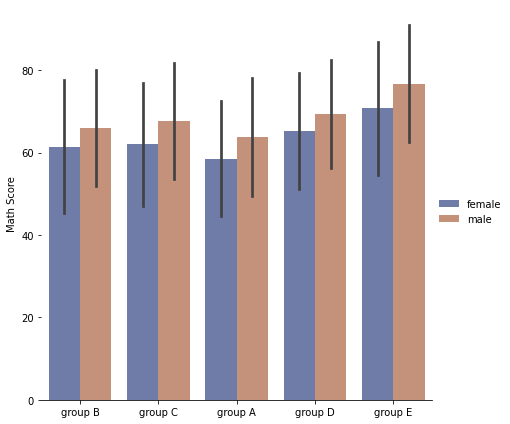

In [5]:
g = sns.catplot(
    data=table, kind="bar",
    x="race/ethnicity", y="math score", hue="gender",
    ci="sd", palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("", "Math Score")
g.legend.set_title("")

Insight: It looks like males systematically score higher on math than females in this data set, although the difference is within uncertainty. A larger data set would beat down random errors and let the systematic differences pop out more. Also the ordering from low to high mean scores for ethnic groups is A,B,C,D, and E.

### Reading score

In [6]:
table.groupby(['gender','race/ethnicity'])['reading score'].agg([np.median, np.mean, np.std])

median       mean        std
gender race/ethnicity                              
female group A           67.5  69.000000  14.847799
       group B           71.5  71.076923  14.612598
       group C           73.0  71.944444  13.900574
       group D           74.0  74.046512  13.914842
       group E           76.0  75.840580  15.349481
male   group A           61.0  61.735849  15.451103
       group B           62.0  62.848837  14.695752
       group C           66.0  65.424460  13.291590
       group D           68.0  66.135338  12.765829
       group E           73.0  70.295775  13.966689

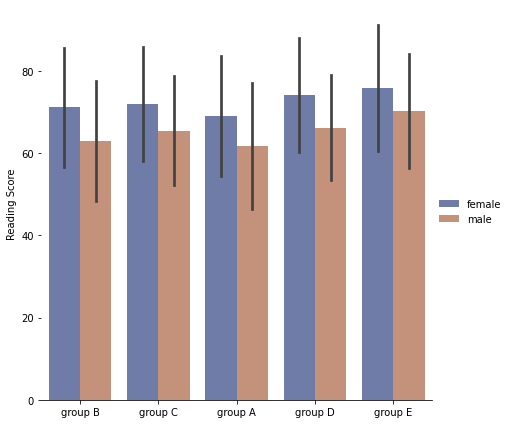

In [7]:
g = sns.catplot(
    data=table, kind="bar",
    x="race/ethnicity", y="reading score", hue="gender",
    ci="sd", palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("", "Reading Score")
g.legend.set_title("")

### Writing score

In [8]:
table.groupby(['gender','race/ethnicity'])['writing score'].agg([np.median, np.mean, np.std])

median       mean        std
gender race/ethnicity                              
female group A           67.0  67.861111  14.652455
       group B           71.5  70.048077  14.891439
       group C           74.0  71.777778  14.806595
       group D           76.0  75.023256  13.866814
       group E           76.0  75.536232  15.703671
male   group A           60.0  59.150943  15.137061
       group B           60.0  60.220930  14.854907
       group C           62.0  62.712230  13.647341
       group D           67.0  65.413534  13.262574
       group E           70.0  67.394366  13.449885

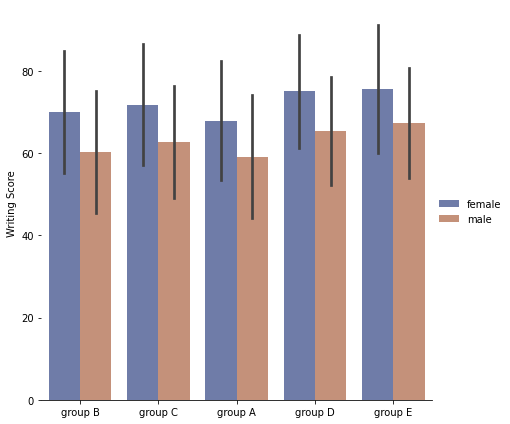

In [9]:
g = sns.catplot(
    data=table, kind="bar",
    x="race/ethnicity", y="writing score", hue="gender",
    ci="sd", palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("", "Writing Score")
g.legend.set_title("")

Insight: Now for reading and writting, its females who systematicaly outscore males in this data set, though again the difference is within the variation of the data set. The rank ordering for race/ethnic groups remains A,B,C,D, and E from low to high.

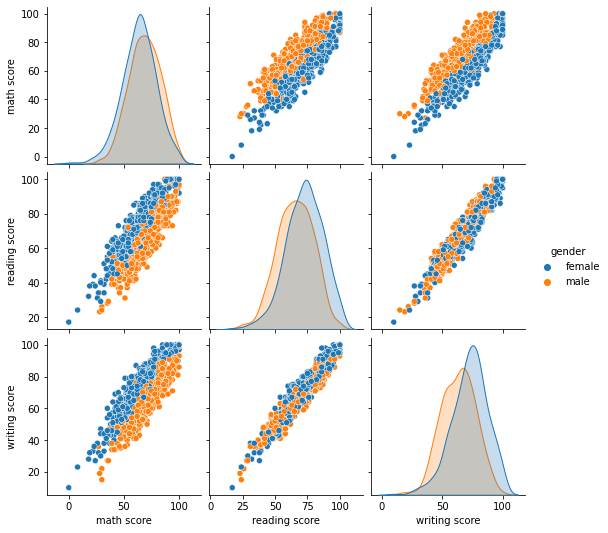

In [10]:
sns.pairplot(table, hue='gender')

Insight: There are strong correlations between the scores, meaning if you do well in one section you are likely to do will in the others. This seems reasonable enough.
We also see here the systematic differences in gender on score, the separation is quite remarkable. But is it statistically significant? We can do a student t's test to see what the significance is.

In [11]:
from scipy import stats

In [12]:
male_flag = table['gender'] == 'male'
female_flag = ~male_flag

In [13]:
stats.ttest_ind(table[male_flag]['math score'], table[female_flag]['math score'])

Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)

In [14]:
stats.ttest_ind(table[male_flag]['reading score'], table[female_flag]['reading score'])

Ttest_indResult(statistic=-7.959308005187657, pvalue=4.680538743933289e-15)

In [15]:
stats.ttest_ind(table[male_flag]['writing score'], table[female_flag]['writing score'])

Ttest_indResult(statistic=-9.979557910004507, pvalue=2.019877706867934e-22)

With such vanishingly small p-values, we can toss out the null hypothesis that there is no difference in the scores of males and females.

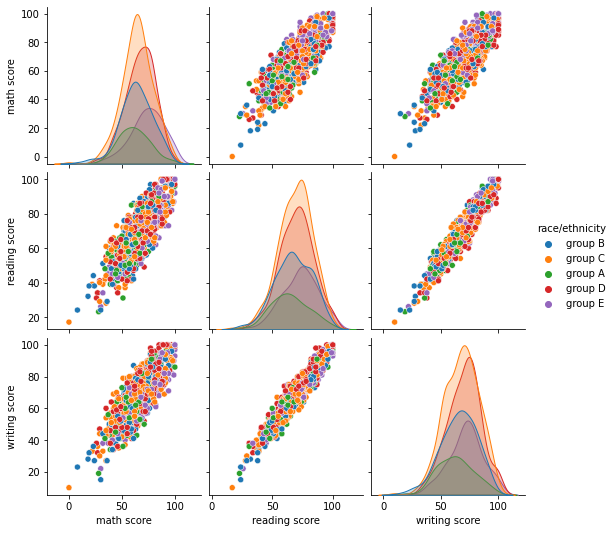

In [16]:
sns.pairplot(table, hue='race/ethnicity')

Although it is hard to see structure in the scatter plots, the density distributions are pretty insightful. Looking at the peaks of the distributions, ordering them seems to roughly follow the ordering of mean scores we saw above.

In [17]:
table.groupby(['race/ethnicity', 'parental level of education']).agg('count')

gender  lunch  \
race/ethnicity parental level of education                  
group A        associate's degree               14     14   
               bachelor's degree                12     12   
               high school                      18     18   
               master's degree                   3      3   
               some college                     18     18   
               some high school                 24     24   
group B        associate's degree               41     41   
               bachelor's degree                20     20   
               high school                      48     48   
               master's degree                   6      6   
               some college                     37     37   
               some high school                 38     38   
group C        associate's degree               78     78   
               bachelor's degree                40     40   
               high school                      64     64   
               master's degree                  19     19   
               some college                     69     69   
               some high school                 49     49   
group D        associate's degree               50     50   
               bachelor's degree                28     28   
               high school                      44     44   
               master's degree                  23     23   
               some college                     67     67   
               some high school                 50     50   
group E        associate's degree               39     39   
               bachelor's degree                18     18   
               high school                      22     22   
               master's degree                   8      8   
               some college                     35     35   
               some high school                 18     18   

                                            test preparation course  \
race/ethnicity parental level of education                            
group A        associate's degree                                14   
               bachelor's degree                                 12   
               high school                                       18   
               master's degree                                    3   
               some college                                      18   
               some high school                                  24   
group B        associate's degree                                41   
               bachelor's degree                                 20   
               high school                                       48   
               master's degree                                    6   
               some college                                      37   
               some high school                                  38   
group C        associate's degree                                78   
               bachelor's degree                                 40   
               high school                                       64   
               master's degree                                   19   
               some college                                      69   
               some high school                                  49   
group D        associate's degree                                50   
               bachelor's degree                                 28   
               high school                                       44   
               master's degree                                   23   
               some college                                      67   
               some high school                                  50   
group E        associate's degree                                39   
               bachelor's degree                                 18   
               high school                                       22   
               master's degree  

[None, None, None, None, None, None, None, None, None, None, None, None]

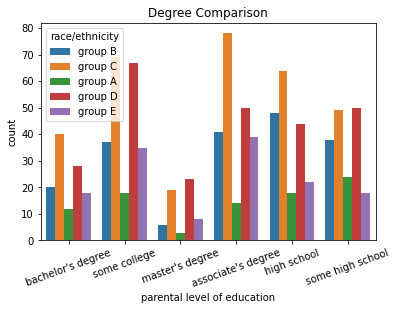

In [58]:
sns.countplot(x = 'parental level of education', data = table, hue='race/ethnicity')
plt.title('Degree Comparison')
locs, labels = plt.xticks()
plt.setp(labels, rotation=20)

Insight: If you are in group C or group D, you are much more likely to have a parent with a masters degree than the other groups. Groups A, B, and E have somewhat comperable numbers of masters degrees. As we noticed before, Groups C and D are the second and third highest scoring groups on average for math, reading, and writting. At first glance, this suggests parent's highest level of education is a strong feature. However, group E is consistently the first highest scoring group, and has few master's degrees

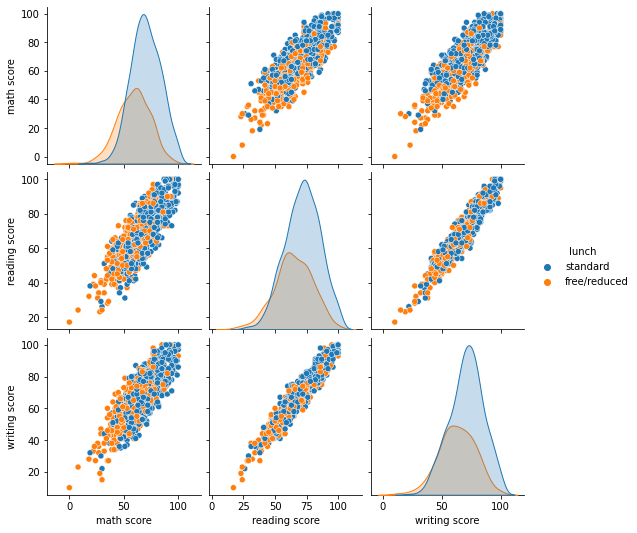

In [49]:
sns.pairplot(table, hue='lunch')

## Machine Learning

Let's have some fun with machine learning. Let's see if we can predict a math score based on the features in the data set, except for the writing and reading score. We can use a random forest regressor, and then see which features are the most important.

In [27]:
# pick off the featur columns and save them for later
object_cols = table.loc[:,'gender':'test preparation course'].columns

In [26]:
# split our data into a training set and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    table.loc[:,'gender':'test preparation course'], table['math score'])

All of the data for our features are categorical. Let's use a label encoder here to encode the different categories. Our other option is also one hot incoding, but the race/ethnicity and parental level of education features have 5 different categories each, and one hot encoding them could become a bit unruely.

In [30]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_test = X_test.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_test[col] = label_encoder.transform(X_test[col])

In [31]:
label_X_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course
153,1,3,1,1,1
819,0,2,5,1,1
863,0,2,4,1,0
806,0,3,4,0,1
991,0,1,5,1,0
...,...,...,...,...,...
529,0,2,0,1,1
614,0,0,0,1,1
340,1,2,2,0,1
756,1,3,4,1,1


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rfRS = RandomizedSearchCV(RandomForestRegressor(),
                         {'n_estimators':[500,600,700,800,900,1000,1500],
                         "max_depth":[1,2,3,4,5]},
                        cv=10, scoring='neg_mean_squared_error')

search = rfRS.fit(label_X_train, y_train)

In [46]:
best_rf = RandomForestRegressor(**search.best_params_)
best_rf.fit(label_X_train, y_train)

ypred = best_rf.predict(label_X_test)

MSE = np.mean(np.square(ypred - y_test))
print('MSE: {}'.format(MSE))


MSE: 184.31974983401113


Text(0.5, 0, 'Relative Importance')

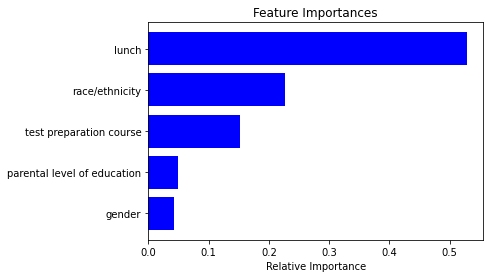

In [47]:
features = object_cols
importances = best_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')